# U.S. Census API tutorial 
Many of the information that is in this tutorial can be found in these links! 
- https://www.census.gov/developers/ *(U.S. census for develeopers link)*
- https://www.youtube.com/watch?v=0DVdHquaRiU *(Data Gem: How to extract data from the US census)* 
- https://www.youtube.com/watch?v=5vvAOsIB2fY *(collect census data in python)*
- https://www.census.gov/data/developers/guidance/api-user-guide.html 
- https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf *(Census data API user guide) Highly recommend that you read*
- https://www.census.gov/geographies.html *(The list of geographies needed)*


## requesting an API key from the U.S. census 
We are going start off by heading to the U.S. census developers page (*https://www.census.gov/developers/*) provided by the United States census for researchers and developers that want to use their data. 

Before we start tackling their API, It's best practice to request an API key first since it provides better customer support and capturing application usage data so that service developers know what services to keep, or make better. 
1. We first go to their website https://www.census.gov/developers/ (U.S. census for developers link) 
2. then, on the left side you will find an image 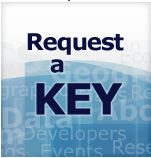 click on this image and fill up a form to recieve an API key on your email.  


## List of available APIs
on the left side of the page you will find a hyperlink text that says, "available APIs". Once you click on it, it will lead to this page https://www.census.gov/data/developers/data-sets.html. This page has all the APIs that the U.S. census has available for the public. For this tutorial, we will use the Population Estimates and Projections(2010 - 2018) API on this site *https://www.census.gov/data/developers/data-sets/popest-popproj/popest.html* with an API call link *https://api.census.gov/data/2018/pep/population* as an example. 

### Let's get started! 
first, let's plug in your API key and check whether we will get a response back from the U.S. census servers 

In [ ]:
import json
import requests

api_key = '3fad1f7c603dfb341edd045495a58a7c0e77f15c' #here you will insert the API key you recieved from your email 
parameters = {"key": api_key}
api_base_url = 'https://api.census.gov/data/2018/pep/population' #API call link
response =requests.get(api_base_url, params = parameters)
print(response.status_code)


Here we made a request to the root of the API. The request we just made had a status code of 200. Status codes are returned with every request that is made to a web server. Status codes indicate information about what happened with a request. Here are some codes that are relevant to GET requests:

- 200 — everything went okay, and the result has been returned (if any)
- 301 — the server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an  endpoint name is changed.
- 401 — the server thinks you’re not authenticated. This happens when you don’t send the right credentials to access an API (we’ll talk about authentication in a later post).
- 400 — the server thinks you made a bad request. This can happen when you don’t send along the right data, among other things.
- 403 — the resource you’re trying to access is forbidden — you don’t have the right permissions to see it.
- 404 — the resource you tried to access wasn’t found on the server.


### Variables 
Now to get specific unit of data in a data set, you will need to specify the variables of API. 


A variable is each unit of data you are searching for in a dataset. Each variable that you can
search for in a dataset has a name, which may be an acronym or meaningful on its own; e.g.,
STNAME, POP, DATE.

In larger datasets, such as the American Community Survey, many of these names are a less
intuitive alphabetical and numerical designation; e.g., B02001_001E (Unweighted Sample Count
of the Population).

Since in this tutorial we are using the Population Estimates and Projections API, their list of variables is located in this link: *https://api.census.gov/data/2018/pep/population/variables.html*

Below we are going request data that has information about the geographic name and population at each state in the united states. 

In [ ]:
parameters.update( {"get": "GEONAME,POP", "for": "state"} ) 

response = requests.get(api_base_url, params = parameters)
print(response.content.decode("utf-8"))

Notice that we added the variables GEONAME and POP in the *"get"* key. By doing this we are able to get informations about the Geographic name and its population. Basically, the pair to the *"get"* key specifies the required and selected variables you are requesting the API. 

While the *"for"* key specifies the geographical level you want for you data. In This example, we have the population for each state in the united states.

### Required Variables ###

There are some data sets that will require you to have certain variables in order for the search to work, these are called **Required variables**. Required variables are the parameters that you need to include in your search; otherwise, your
search will produce no data and an error message. For example, the variable *"date"* is required in this table below. 
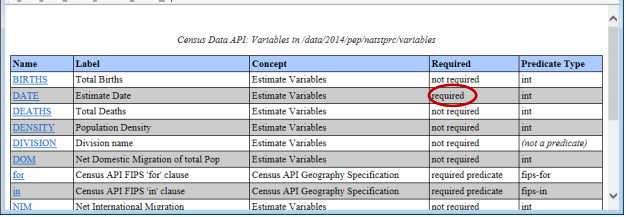

### Predicate ###

what the variable does setting up what the variable outputs. 

The predicate specifies how variables should be filtered or limited, and you can create
predicates of geography, string variables, numeric variables, and time (in time series datasets).

In the example below, we added the variable *"DATE_CODE"*. *"DATE_CODE"* is a predicate **("DATE_CODE":3)**, so you do not need to
include it in the get key. 

by adding the *"DATE_CODE"* predicate, we limited our data to, *"7/1/2010 population estimate".* 

NOTE: We also added wildcard to our "for" key. A wildcard(:*****) can be included to search for *all the values of a variable. Wildcards work only for geographies and string variables only.*

Also below, we limited our seach to all population estimates in july of 2010 on all of the states of the U.S. 

NOTE: An idea to keep in mind is that variables are only used once in the parameters. They may only appear in the *"get"* statements or as a *predicate.* 

In [ ]:
parameters.update( {"get": "GEONAME,POP,DATE_DESC", "DATE_CODE": "3", "for":"state:*"} ) 

response = requests.get(api_base_url, params = parameters)
print(response.content.decode("utf-8"))

### Geography ###

The predicate **"for"** restricts the variables by geography at various levels, while **"in"** and **"+"**
restricts to geographic areas smaller than state level. You can include wildcards (:*****) along
with *for* and *in*.

**Examples:**
- **"for":"state:01"** – restricts the result to include only Alabama
- **"for":"county:001","in":"state:01"** – restricts the result to include only Autauga County, Alabama
- **"for":"county:073","in":"state:01+place:07000"** – restricts the result to include the portion of Jefferson County (county:073), Alabama that is within Birmingham city(place:07000)<br>

**Examples with wildcards:**
- **"for": "state:*"** – retrieves the result for all states
- **"for":"county:*","in":"state:01"** – restricts the result to include all counties in Alabama
- **"for":"county:*","in":"state:01+place:62328"** – restricts the result to include all counties within Prattville city (place: 62328), Alabama

*https://www.census.gov/geographies/reference-files/2015/demo/popest/2015-fips.html* heres a list of codes you can reference when choosing the geography location. Also, you can use *https://tigerweb.geo.census.gov/tigerweb/* to determine the code of the place you need. 

for more information on u.s. census geography you can visit *https://www.census.gov/programs-surveys/geography.html.* 

Below, we have an example of the data population estimates in july of 2010 on all of the places around erie county, N.Y. 
(New York code= 36, Erie county code = 029)

In [ ]:
parameters.update( {"for":"place:*", "in":"state:36+county:029"} ) 

response = requests.get(api_base_url, params = parameters)
print(response.content.decode("utf-8"))

### Range of values 

You can create a predicate of a range of values for a numeric (int) variable. Please note that
you cannot build a predicate with wildcards for numeric variables.

**Examples from County Business Patterns:**
- **"PAYANN":"100000"** – restricts the result to include data where annual payroll is equal to 100,000
- **"PAYANN":"200000&300000"** – restricts the result to include data where annual payroll is equal to 200,000 or 300,000
- **"PAYANN":"0:399999"** – restricts the result to include data with annual payroll less than 400,000
- **"PAYANN":"400000:500000"** – restricts the result to include data where annual payroll is from 400,000 to 500,000.


## Excercise

Below is an excercise to help you practice using the census API! 

In [ ]:
'''
*this is an immutable cell 
-this is to remove the pair of keys for the excercise to test whether you understand the material or not 
'''
del parameters["get"]
del parameters["in"]
del parameters["DATE_CODE"]
del parameters["for"]


#### 1. list of all the population estimate during the start of 2013 to 2018 with a date description and a geographical name at the state of New York (code:  36)  ###


In [ ]:
parameters.update( { } ) #Write in the necessary keys to achieve the output below 


response = requests.get(api_base_url, params = parameters)
print(response.content.decode("utf-8"))

**the output should look like this**

[["GEONAME","POP","DATE_DESC","DATE_CODE","state"],<br>
["New York","19628043","7/1/2013 population estimate","6","36"],<br>
["New York","19656330","7/1/2014 population estimate","7","36"],<br>
["New York","19661411","7/1/2015 population estimate","8","36"],<br>
["New York","19641589","7/1/2016 population estimate","9","36"],<br>
["New York","19590719","7/1/2017 population estimate","10","36"],<br>
["New York","19542209","7/1/2018 population estimate","11","36"]]